<a href="https://colab.research.google.com/github/RahinaBintang/KecerdasanBuatan/blob/main/Neural_Network/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YJAMycdbP0F5NTKDp3G66CGuAdW4aNWm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1YJAMycdbP0F5NTKDp3G66CGuAdW4aNWm" -O Dataset.zip && rm -rf /tmp/cookies.txt

--2021-11-16 07:45:44--  https://docs.google.com/uc?export=download&confirm=YOTG&id=1YJAMycdbP0F5NTKDp3G66CGuAdW4aNWm
Resolving docs.google.com (docs.google.com)... 142.251.6.139, 142.251.6.101, 142.251.6.102, ...
Connecting to docs.google.com (docs.google.com)|142.251.6.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-18-docs.googleusercontent.com/docs/securesc/bk7uovd27os8cop0ckpok3g6c8cjsgfj/lqrc93tjv8fpcpnn7l7i6fon77uijnev/1637048700000/11002468481254343632/03134093268689052609Z/1YJAMycdbP0F5NTKDp3G66CGuAdW4aNWm?e=download [following]
--2021-11-16 07:45:45--  https://doc-10-18-docs.googleusercontent.com/docs/securesc/bk7uovd27os8cop0ckpok3g6c8cjsgfj/lqrc93tjv8fpcpnn7l7i6fon77uijnev/1637048700000/11002468481254343632/03134093268689052609Z/1YJAMycdbP0F5NTKDp3G66CGuAdW4aNWm?e=download
Resolving doc-10-18-docs.googleusercontent.com (doc-10-18-docs.googleusercontent.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to

In [2]:
import os
import zipfile

local_zip = 'Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [4]:
base_dir = 'Dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_jeruk_dir = os.path.join(train_dir, 'DaunJeruk')
train_kemangi_dir = os.path.join(train_dir, 'DaunKemangi')

validation_jeruk_dir = os.path.join(validation_dir, 'DaunJeruk')
validation_kemangi_dir = os.path.join(validation_dir, 'DaunKemangi')

In [5]:
# Cek penamaan image yang ada di folder train_jeruk_dir dan train_kemangi_dir
print(os.listdir(train_jeruk_dir)[:10])
print(os.listdir(train_kemangi_dir)[:10])

['jeruk.30.jpg', 'jeruk.2.jpg', 'jeruk.16.jpg', 'jeruk.6.jpg', 'jeruk.3.jpg', 'jeruk.4.jpg', 'jeruk.36.jpg', 'jeruk.9.jpg', 'jeruk.31.jpg', 'jeruk.32.jpg']
['kemangi.1.jpg', 'kemangi.27.jpg', 'kemangi.14.jpg', 'kemangi.31.jpg', 'kemangi.9.jpg', 'kemangi.36.jpg', 'kemangi.33.jpg', 'kemangi.35.jpg', 'kemangi.28.jpg', 'kemangi.15.jpg']


In [6]:
# Cek jumlah data train dan data validation
print('total training jeruk images:', len(os.listdir(train_jeruk_dir)))
print('total training kemangi images:', len(os.listdir(train_kemangi_dir)))
print('total validation jeruk images:', len(os.listdir(validation_jeruk_dir)))
print('total validation kemangi images:', len(os.listdir(validation_kemangi_dir)))

total training jeruk images: 40
total training kemangi images: 40
total validation jeruk images: 10
total validation kemangi images: 10


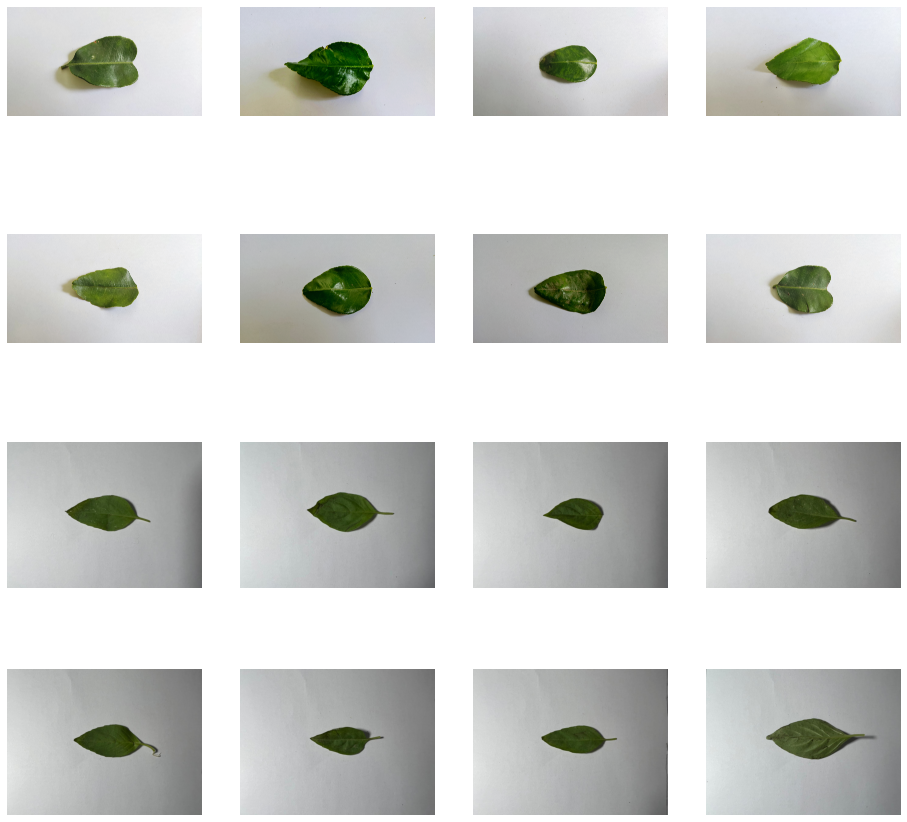

In [7]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_jeruk_pix = [os.path.join(train_jeruk_dir, fname) 
                for fname in os.listdir(train_jeruk_dir)[pic_index-8:pic_index]]
next_kemangi_pix = [os.path.join(train_kemangi_dir, fname) 
                for fname in os.listdir(train_kemangi_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_jeruk_pix+next_kemangi_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [8]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [9]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

DATA PREPROCESSING

In [10]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (80, 150, 150, 3)
Train Label =  (80,)
Validation Data =  (20, 150, 150, 3)
Validation Label =  (20,)


In [11]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [222 218 217]
Data setelah di-normalisasi  [0.87058824 0.85490197 0.8509804 ]


In [15]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[30:50])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[30:50])

Label sebelum di-encoder  ['DaunJeruk' 'DaunJeruk' 'DaunJeruk' 'DaunJeruk' 'DaunJeruk' 'DaunJeruk'
 'DaunJeruk' 'DaunJeruk' 'DaunJeruk' 'DaunJeruk' 'DaunKemangi'
 'DaunKemangi' 'DaunKemangi' 'DaunKemangi' 'DaunKemangi' 'DaunKemangi'
 'DaunKemangi' 'DaunKemangi' 'DaunKemangi' 'DaunKemangi']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


DEFINISIKAN MODEL

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [17]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [18]:
# Tampilkan model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 128)               8640128   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [19]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [20]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
4/4 [==============================] - 1s 108ms/step - loss: 26.3460 - acc: 0.4500 - val_loss: 8.1720 - val_acc: 0.5000
Epoch 2/50
4/4 [==============================] - 0s 60ms/step - loss: 8.4187 - acc: 0.5000 - val_loss: 3.5867 - val_acc: 0.5000
Epoch 3/50
4/4 [==============================] - 0s 60ms/step - loss: 1.7599 - acc: 0.6375 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/50
4/4 [==============================] - 0s 57ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 70ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 57ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 58ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 8/50
4/4 [==============================] - 0s 55ms/step - loss: 0.6932 - acc: 0.5000 - v

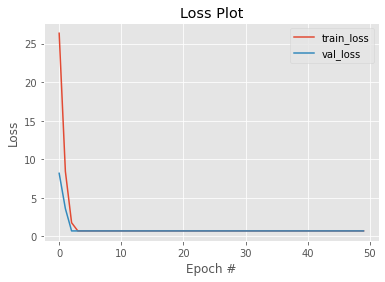

In [21]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

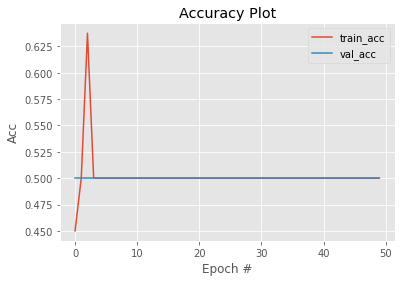

In [22]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.00      0.00      0.00        10

    accuracy                           0.50        20
   macro avg       0.25      0.50      0.33        20
weighted avg       0.25      0.50      0.33        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
